# Build simple linear regression

## Introduction

In this activity, I will use simple linear regression to explore the relationship between two continuous variables. To accomplish this, I will perform a complete simple linear regression analysis, which includes creating and fitting a model, checking model assumptions, analyzing model performance, interpreting model coefficients, and communicating results to stakeholders.

In this activity, I will explore the relationship between marketing promotional budgets and sales. The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, decisions will be made about where to focus future marketing efforts. So it is critical to have a clear understanding of the relationship between the different types of marketing and the revenue they generate.

## Step 1: Imports

### Import packages

In [5]:
# Import pandas, pyplot from matplotlib, and seaborn.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import the statsmodel module and the ols function

Import the `statsmodels.api` Python module using its common abbreviation, `sm`, along with the `ols()` function from `statsmodels.formula.api`.

In [6]:
# Import the statsmodel module.
import statsmodels.api as sm

# Import the ols function from statsmodels.
from statsmodels.formula.api import ols

### Load the dataset

Load the provided dataset `marketing_and_sales_data_evaluate_lr.csv` as `data` and display the first five rows. This is a fictional dataset that was created.

In [8]:
# Load the data. 

data = pd.read_csv('C:/2_PERSONAL\Data Science/Google Advanced Data Analytics/Course5_Regression Analysis Simplify Complex Data Relationships/4. Annotated follow-along guide_ Interpret multiple regression results with Python/marketing_and_sales_data_evaluate_lr.csv')

# Display the first five rows.

data.head()

,TV,Radio,Social_Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181


## Step 2: Data exploration

### Familiarize yourself with the data's features

Start with an exploratory data analysis to familiarize with the data and prepare it for modeling.

The features in the data are:
* TV promotion budget (in millions of dollars)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)

Each row corresponds to an independent marketing promotion where the business invests in `TV`, `Social_Media`, and `Radio` promotions to increase `Sales`.

The business would like to determine which feature most strongly predicts `Sales` so they have a better understanding of what promotions they should invest in in the future. To accomplish this, I will construct a simple linear regression model that predicts sales using a single independent variable. 

Some reasons for conducting an EDA before constructing a simple linear regression model

* Understanding which variables are present in the data
* Reviewing the distribution of features, such as minimum, mean, and maximum values
* Plotting the relationship between the independent and dependent variables to visualize which feature is the best choice for X
* Identifying issues with the data, such as incorrect values (e.g., typos) or missing values

### Explore the data size

Calculate the number of rows and columns in the data.

In [9]:
# Display the shape of the data as a tuple (rows, columns).

data.shape

(4572, 4)

### Explore the independent variables

There are three continuous independent variables: `TV`, `Radio`, and `Social_Media`. To understand how heavily the business invests in each promotion type, use `describe()` to generate descriptive statistics for these three variables.

In [10]:
# Generate descriptive statistics about TV, Radio, and Social_Media.

data[['TV','Radio','Social_Media']].describe()

,TV,Radio,Social_Media
count,4562.000000,4568.000000,4566.000000
mean,54.066857,18.160356,3.323956
std,26.125054,9.676958,2.212670
min,10.000000,0.000684,0.000031
25%,32.000000,10.525957,1.527849
50%,53.000000,17.859513,3.055565
75%,77.000000,25.649730,4.807558
max,100.000000,48.871161,13.981662


### Explore the dependent variable

Before fitting the model, ensure the `Sales` for each promotion (i.e., row) is present. If the `Sales` in a row is missing, that row isn't of much value to the simple linear regression model.

Display the percentage of missing values in the `Sales` column in the DataFrame `data`.

In [11]:
# Calculate the average missing rate in the sales column.
missing_sales = data.Sales.isna().mean()

# Convert the missing_sales from a decimal to a percentage and round to 2 decimal places.
missing_sales = round(missing_sales*100, 2)

# Display the results (missing_sales must be converted to a string to be concatenated in the print statement).
print('Percentage of promotions missing Sales: ' +  str(missing_sales) + '%')

Percentage of promotions missing Sales: 0.13%


**Note** 

The preceding output shows that 0.13% of rows are missing the `Sales` value.

### Remove the missing data

Remove all rows in the data from which `Sales` is missing.

In [9]:
# Subset the data to include rows where Sales is present.

data = data.dropna(subset = ['Sales'], axis = 0)

### Visualize the sales distribution

Create a histogram to visualize the distribution of `Sales`.

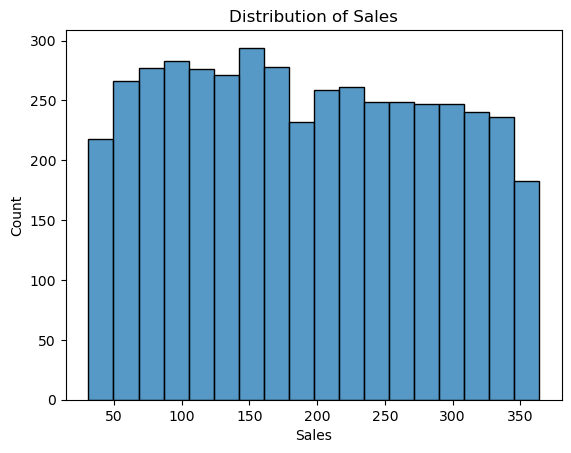

In [12]:
# Create a histogram of the Sales.

fig = sns.histplot(data['Sales'])

# Add a title
fig.set_title('Distribution of Sales');

**Note** 

Generally, `Sales` are equally distributed between 25 and 350 million. 

## Step 3: Model building

Create a pairplot to visualize the relationships between pairs of variables in the data. This is to visually determine which variable has the strongest linear relationship with `Sales`. This will help us select the X variable for the simple linear regression.

C:\Users\Sajindra\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


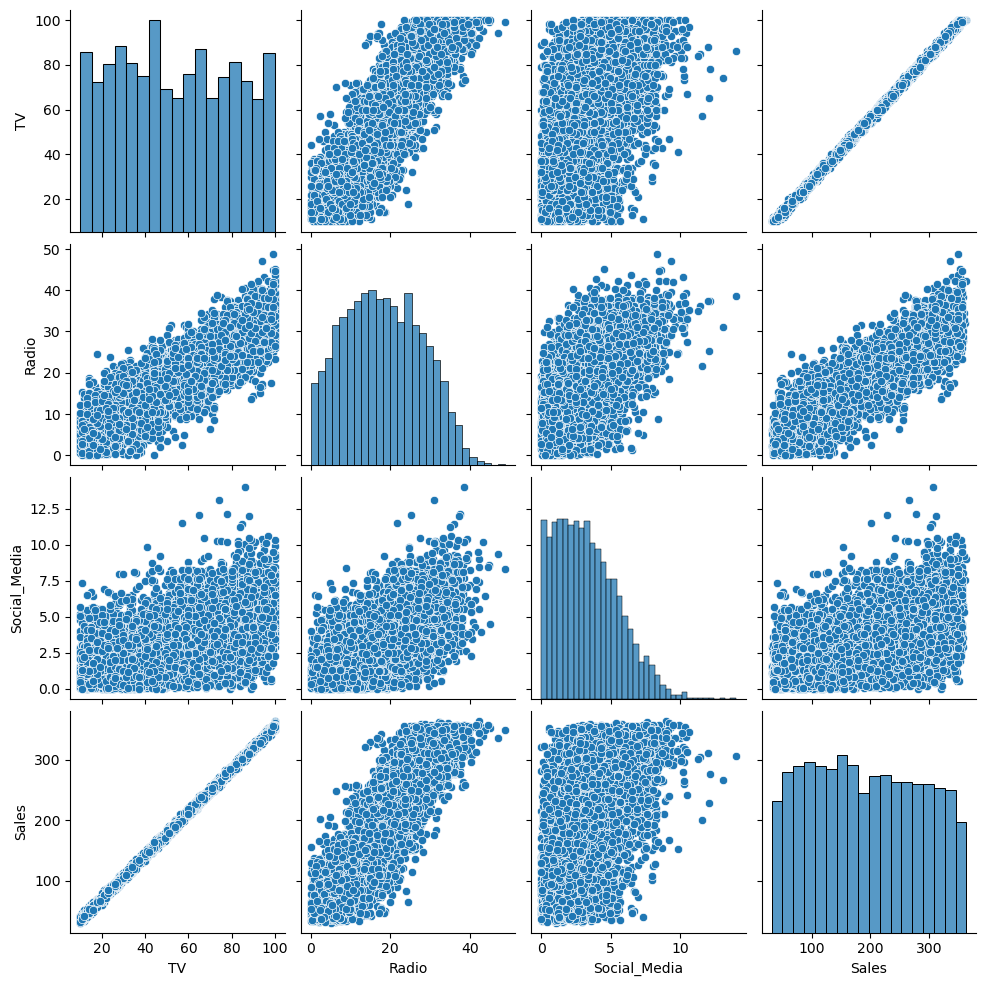

In [13]:
# Create a pairplot of the data.

sns.pairplot(data);

**Note**

`TV` clearly has the strongest linear relationship with `Sales`. We can draw a straight line through the scatterplot of `TV` and `Sales` that confidently estimates `Sales` using `TV`. `Radio` and `Sales` appear to have a linear relationship, but there is larger variance than between `TV` and `Sales`.

### Build and fit the model

Replace the comment with the correct code. Use the variable you chose for `X` for building the model.

In [14]:
# Define the OLS formula.
ols_formula = 'Sales ~ TV'

# Create an OLS model.
OLS = ols(formula = ols_formula, data = data)

# Fit the model.
model = OLS.fit()

# Save the results summary.
model_results = model.summary()

# Display the model results.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Sat, 17 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:36:04   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Check model assumptions

To justify using simple linear regression, check that the four linear regression assumptions are not violated. These assumptions are:

* Linearity
* Independent Observations
* Normality: This is done after model constructed using QQ-plot or histogram of residuals
* Homoscedasticity (constant variance): This is done after model constructed using scatterplot of the fitted values vs residuals

### Model assumption: Linearity

The linearity assumption requires a linear relationship between the independent and dependent variables. Check this assumption by creating a scatterplot comparing the independent variable with the dependent variable. 

Create a scatterplot comparing the X variable you selected with the dependent variable.

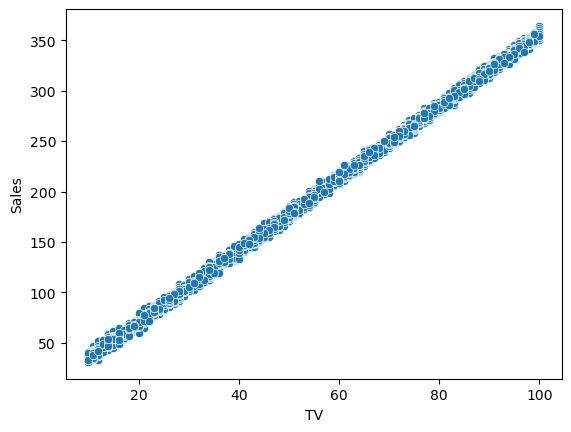

In [15]:
# Create a scatterplot comparing X and Sales (Y).

sns.scatterplot(x = data['TV'], y = data['Sales']);

**Note**

There is a clear linear relationship between `TV` and `Sales`, meeting the linearity assumption.

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

Also, if the assumption is met, we would expect a scatter plot of the fitted values versus residuals to resemble a random cloud of data points. If there are any patterns, then we might need to re-examine the data.

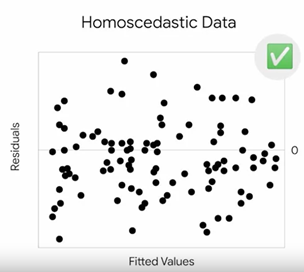
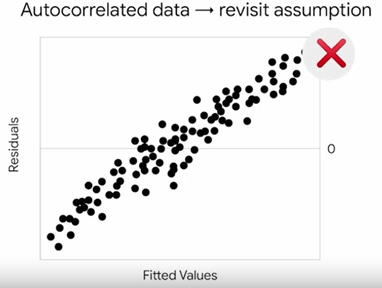

### Model assumption: Normality

The **normality assumption** states that the errors are normally distributed.

Create two plots to check this assumption:

* **Plot 1**: Histogram of the residuals

    Residual = Observed – Predicted
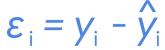

* **Plot 2**: Q-Q plot of the residuals

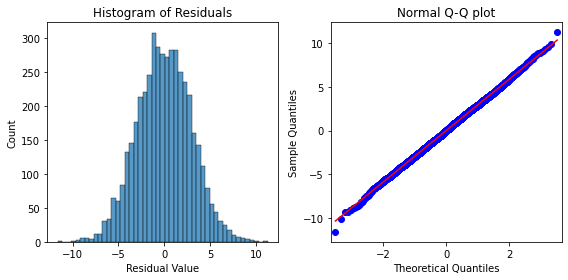

In [13]:
# Calculate the residuals.

residuals = model.resid

# Create a 1x2 plot figure. (1 - row and 2- columns subplot --> plots along X axis)
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals .

### YOUR CODE HERE ### 

sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.

### YOUR CODE HERE ### 

sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title("Normal Q-Q plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

**Note**

The histogram of the residuals are approximately normally distributed, which supports that the normality assumption is met for this model.
The residuals in the Q-Q plot form a straight line, further supporting that the normality assumption is met.

### Model assumption: Homoscedasticity

The **homoscedasticity (constant variance) assumption** is that the residuals have a constant variance for all values of `X`.

Check that this assumption is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

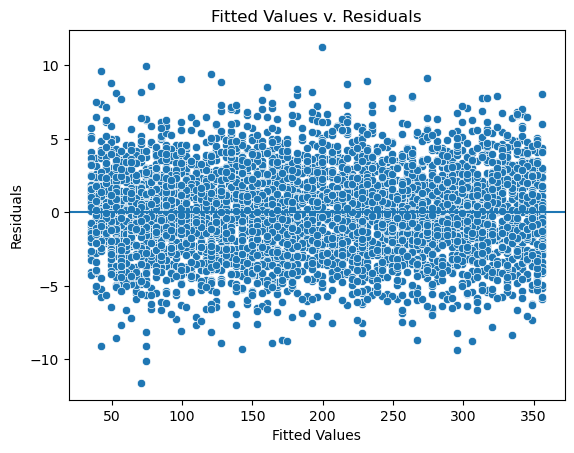

In [16]:
# Create a scatterplot with the fitted values from the model and the residuals.

fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x-axis label.
fig.set_xlabel("Fitted Values")

# Set the y-axis label.
fig.set_ylabel("Residuals")

# Set the title.
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

fig.axhline(0)

# Show the plot.
plt.show()

**Note** 

The variance of the residuals is consistant across all $X$. Thus, the assumption of homoscedasticity is met.

## Step 4: Results and evaluation

### Display the OLS regression results

If the linearity assumptions are met, we can interpret the model results accurately.

Display the OLS regression results from the fitted model object, which includes information about the dataset, model fit, and coefficients.

In [14]:
# Display the model_results defined previously.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Wed, 28 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:51:28   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Note** The R-squared on the preceding output measures the proportion of variation in the dependent variable (Y) explained by the independent variable (X).

Using `TV` as X results in a simple linear regression model with $R^{2} = 0.999$. In other words, `TV` explains $99.9\%$ of the variation in `Sales`. The R-squared value will depend on the variable selected for X. 
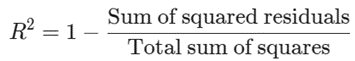


### Interpret the model results

With the model fit evaluated, we can assess the coefficient estimates and the uncertainty of these estimates.

When `TV` is used as the independent variable X, the coefficient for the `Intercept` is -0.1263 and the coefficient for `TV` is 3.5614. 

Write the relationship between X and `Sales` in the form of a linear equation?

When `TV` is used as the independent variable X, the linear equation is:

$Y = \text{Intercept} + \text{Slope} * X$

$\text{Sales (in millions)} = \text{Intercept} + \text{Slope} *\text{TV (in millions)}$

$\text{Sales (in millions)} = -0.1263 + 3.5614 * \text{TV (in millions)}$

**Interpretation** of the relationship between X and `Sales`

According to the model, when `TV` is used as the independent variable X, an increase of one million dollars for the TV promotional budget results in an estimated 3.5614 million dollars more in sales.

Beta coefficients allow you to estimate the magnitude and direction (positive or negative) of the effect of each independent variable on the dependent variable. The coefficient estimates can be converted to explainable insights, such as the connection between an increase in TV promotional budgets and sales mentioned previously.

### Measure the uncertainty of the coefficient estimates

Model coefficients are estimated. This means there is an amount of uncertainty in the estimate. A p-value and $95\%$ confidence interval are provided with each coefficient to quantify the uncertainty for that coefficient estimate.

In regression analysis, for each beta coefficient, we are testing the following set of null and alternative hypotheses:

H₀ (null hypothesis): β1 = 0

H₁ (alternative hypothesis): β1 ≠ 0

If p-value is less than 0.05, we can reject the null hypothesis.

In [15]:
# Display the model_results defined previously.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Wed, 28 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:51:28   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on this model, interpretation of the p-value and confidence interval for the coefficient estimate of X:

When `TV` is used as the independent variable, it has a p-value of $0.000$ and a $95\%$ confidence interval of $[3.558,3.565]$. This means there is a $95\%$ chance the interval $[3.558,3.565]$ contains the true parameter value of the slope. These results indicate little uncertainty in the estimation of the slope of X. Therefore, the business can be confident in the impact `TV` has on `Sales`.

**Note** 

Potential areas to explore include:

* Providing the business with the estimated sales given different TV promotional budgets
* Using both `TV` and `Radio` as independent variables
* Adding plots to help convey the results, such as using the `seaborn` `regplot()` to plot the data with a best fit regression line

What recommendations can we make to the leadership at your organization?

Of the three available promotion types (TV, radio, and social media), TV has the strongest positive linear relationship with sales. According to the model, an increase of one million dollars for the TV promotional budget will result in an estimated 3.5614 million dollars more in sales. This is a very confident estimate, as the p-value for this coefficient estimate is small. Thus, the business should prioritize increasing the TV promotional budget over the radio and social media promotional budgets to increase sales. 

## Considerations

**What are some key takeaways?**

* Exploratory data analysis can be used to find a suitable X variable for a simple linear regression model.
* It's important to check that simple linear regression assumptions are met before interpreting model results.
* R-squared is a useful measure of prediction error.
* It's important to provide measures of uncertainty (e.g., p-values, confidence intervals) with any coefficient estimates. 


**What findings can we share with others?**

* Sales is relatively equally distributed between \\$25 and \\$350 million across all promotions. 
* In the data visualization, TV has the strongest linear relationship with sales. Radio and sales appear to have a moderate linear relationship, but there is larger variance than between TV and sales. Social media and sales appear to have a weak linear relationship.
* When TV is used as the independent variable, the R-squared for the simple linear regression model estimating sales is 0.999.
* When TV is used as the independent variable, the coefficient for the intercept is -0.1263 and the coefficient for TV is 3.5614.
* When TV is used as the independent variable, the slope of the coefficient for TV has a p-value of 0.000 and a 95% confidence interval of [3.558, 3.565].


**How can we frame your findings to stakeholders?**

* Among TV, social media, and radio, TV had the strongest positive linear relationship with sales. 
* The linear regression model estimates that 99.9% of the variation in sales is explained by the TV promotional budget. In other words, nearly all of the variation in sales can be explained by the TV promotional budget alone, making TV an excellent predictor of sales.
* According to the model, when TV is used as the independent variable X, an increase of one million dollars for the TV promotional budget would result in an estimated 3.5614 million more dollars in sales. 
* The interval (3.558 million, 3.565 million) has a 95% probability of containing the true estimate of the increase in sales for a one million dollar increase in the TV promotional budget. Therefore, the estimate provided in the previous bullet is very confident.